## Support Vector Regression (SVR)

* SVR is a type of regression that tries to fit the **best possible line (or curve)** within a certain **margin of tolerance (ε-insensitive tube)**.
* It uses **kernels** (like RBF, polynomial, linear) to handle **non-linear relationships**.

### Formula (RBF Kernel):

The prediction function is:

$
\hat{y} = \sum\_{i=1}^m (\alpha\_i - \alpha\_i^*) K(x\_i, x) + b
$

Where:

* **$x\_i$** → Support vectors (key data points that define the margin)
* **$\alpha\_i, \alpha\_i^*$** → Coefficients learned by the model
* **$K(x\_i, x)$** → Kernel function (RBF in this case)

For the **Radial Basis Function (RBF) kernel**:

$
K(x\_i, x) = \exp \Big( -\gamma | x\_i - x |^2 \Big)
$




### Explanation:

* **$\hat{y}$** → The predicted output (Salary)
* **$K(x\_i, x)$** → Measures similarity between input $x$ and support vector $x\_i$
* **$\gamma$** → Controls how far the influence of a single support vector reaches
* **ε (epsilon)** → Defines a margin of tolerance (errors within ±ε are ignored)


### What it means:

* Instead of fitting a **line (Linear Regression)** or a **polynomial curve (Polynomial Regression)**, SVR tries to fit a **smooth curve** that keeps most predictions within an acceptable margin.
* With **RBF kernel**, SVR can model very **complex and curved relationships**.


### Example: Position vs Salary (Non-linear Growth)

Suppose Salary doesn’t increase linearly with Level but grows in a **curved pattern**.
SVR with **RBF kernel** can capture this growth better than simple linear or polynomial regression.


### Let’s try with some sample values (not exact, just illustrative):

| Level (x) | Actual Salary (Y) | Linear Predicted | Polynomial Predicted | SVR (RBF) Predicted |
| --------- | ----------------- | ---------------- | -------------------- | ------------------- |
| 1         | 45k               | 40k              | 44k                  | 45k                 |
| 3         | 60k               | 55k              | 61k                  | 60k                 |
| 6         | 150k              | 100k             | 140k                 | 148k                |
| 10        | 1M                | 300k             | 950k                 | 1M                  |

SVR adapts smoothly because of the **RBF kernel** similarity function.

---

### Solve:

* You are given a [Position\_Salaries.csv dataset](https://www.kaggle.com/datasets/chaitanyachandra/data-csv?select=Position_Salaries.csv) containing:

  * **Position** (string, e.g., "Business Analyst", "CEO")
  * **Level** (numeric, 1–10)
  * **Salary** (numeric, target variable)

* Build an **SVR model with RBF kernel** to predict Salary from Level.

* Tasks:

  * Load and explore the dataset.
  * Select `Level` as the independent variable and `Salary` as the dependent variable.
  * Scale features (StandardScaler) since SVR is sensitive to feature scaling.
  * Train an SVR model with **RBF kernel**.
  * Create a numpy array with predicted data.
  * Plot predictions vs actual salaries.



In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data-set
dataset = pd.read_csv("/kaggle/input/data-csv/Position_Salaries.csv")
independent_x = dataset.iloc[:, 1:-1].values
dependent_y = dataset.iloc[:, -1].values 
dependent_y = dependent_y.reshape(len(dependent_y), 1)
independent_x, dependent_y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]]))

In [3]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

scaled_x = sc_x.fit_transform(independent_x)
scaled_y = sc_y.fit_transform(dependent_y)
scaled_x, scaled_y

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]))

In [4]:
# train 
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # Radial basis function kernel
regressor.fit(scaled_x, scaled_y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [5]:
# exp for 6.5 level vith SVN Radial basis function kernel
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [6]:
# predict
sc_y.inverse_transform(regressor.predict(sc_x.transform(independent_x)).reshape(-1,1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

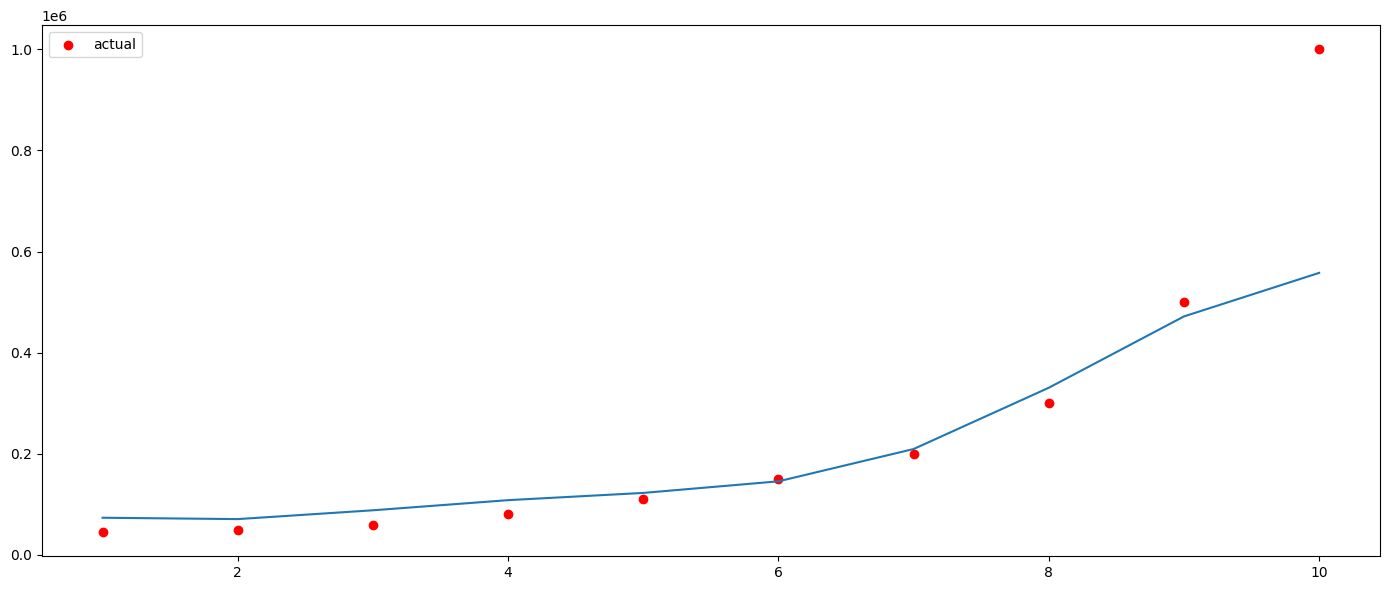

In [7]:
plt.figure(figsize=(14, 6))
plt.scatter(independent_x, dependent_y, color="red", label="actual")
plt.plot(independent_x, sc_y.inverse_transform(regressor.predict(sc_x.transform(independent_x)).reshape(-1,1)))
plt.legend()
plt.tight_layout()
plt.show()